Dataset: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

Paper: A practical framework for early detection of diabetes using ensemble machine learning models

Authors: Qusay Saihood, Emrullah Sonuç

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd

# Extracción de datos
data_path = '/content/drive/MyDrive/Modulo2/Datos/diabetes_prediction_dataset.csv'
df= pd.read_csv(data_path, low_memory=False, delimiter=',')
df.columns = df.columns.str.strip()

# Calculate majority smoking status for each diabetes class for data impute
majority_smoking_status_class_0 = df[df['diabetes'] == 0]['smoking_history'].mode()[0]
majority_smoking_status_class_1 = df[df['diabetes'] == 1]['smoking_history'].mode()[0]

df['male'] = 0
df['female'] = 0
df['no smoke'] = 0
df['smoke'] = 0

# One hot encoding for gender
df['male'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['female'] = df['gender'].apply(lambda x: 1 if x == 'Female' else 0)

# One hot encoding for smoke history
df['smoke'] = df['smoking_history'].apply(lambda x: 1 if x in ['former', 'current', 'ever'] else 0)
df['no smoke'] = df['smoking_history'].apply(lambda x: 0 if x in ['former', 'current', 'ever'] else 1)

# Set default smoke values based on majority smoking status for class 0 (no diabetes)
smoke_vals_0 = [0, 1] if majority_smoking_status_class_0.lower() not in ['former', 'current', 'ever'] else [1, 0]

# Handle 'No Info' smoking history for class 0 (diabetes == 0)
df.loc[(df['smoking_history'] == 'No Info') & (df['diabetes'] == 0), ['smoke', 'no smoke']] = smoke_vals_0

# Set default smoke values based on majority smoking status for class 1 (diabetes)
smoke_vals_1 = [0, 1] if majority_smoking_status_class_1.lower() not in ['former', 'current', 'ever'] else [1, 0]

# Handle 'No Info' smoking history for class 1 (diabetes == 1)
df.loc[(df['smoking_history'] == 'No Info') & (df['diabetes'] == 1), ['smoke', 'no smoke']] = smoke_vals_1

df = df.drop(columns=['gender', 'smoking_history'])
data = df.drop(columns=['diabetes'])

train_labels = df['diabetes'].iloc[:int(len(data) * .8)]
test_labels = df['diabetes'].iloc[int(len(data) * .8):]

train_set = data.iloc[:int(len(data) * .8)]
test_set = data.iloc[int(len(data) * .8):]


Set de entrenamiento no normalizado


<Axes: >

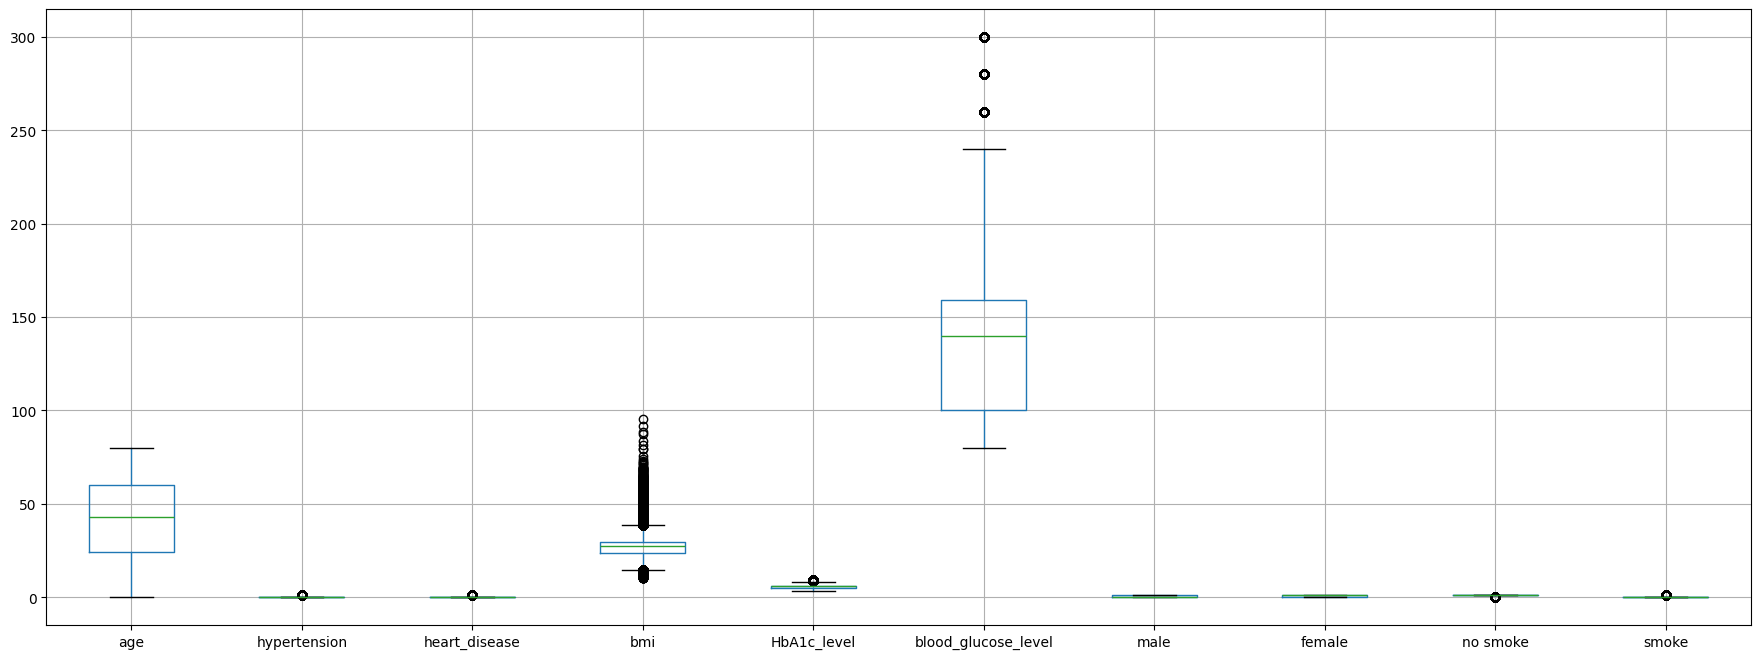

In [3]:
import matplotlib as plt

# Visualización gráfica de los datos no normalizados
print('Set de entrenamiento no normalizado')
train_set.boxplot(figsize=(22, 8))

Set de pruebas no normalizado


<Axes: >

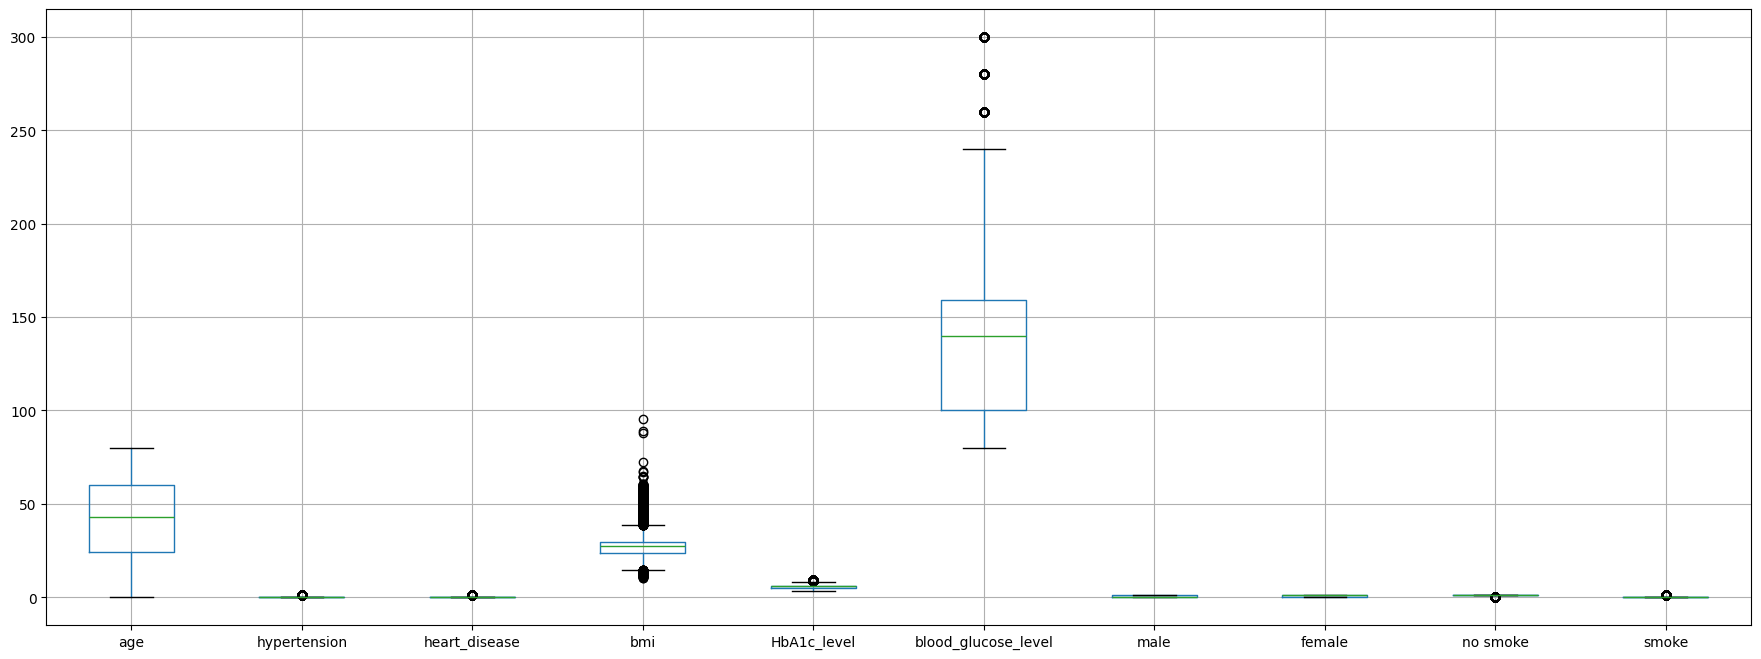

In [4]:
# Visualización gráfica de los datos de pruebas no normalizados
print('Set de pruebas no normalizado')
test_set.boxplot(figsize=(22, 8))

In [5]:
from sklearn.preprocessing import StandardScaler

# Normalización de datos
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train_set), columns=data.columns)
test_scaled = pd.DataFrame(scaler.fit_transform(test_set), columns=data.columns)

Set de entrenamiento normalizado


<Axes: >

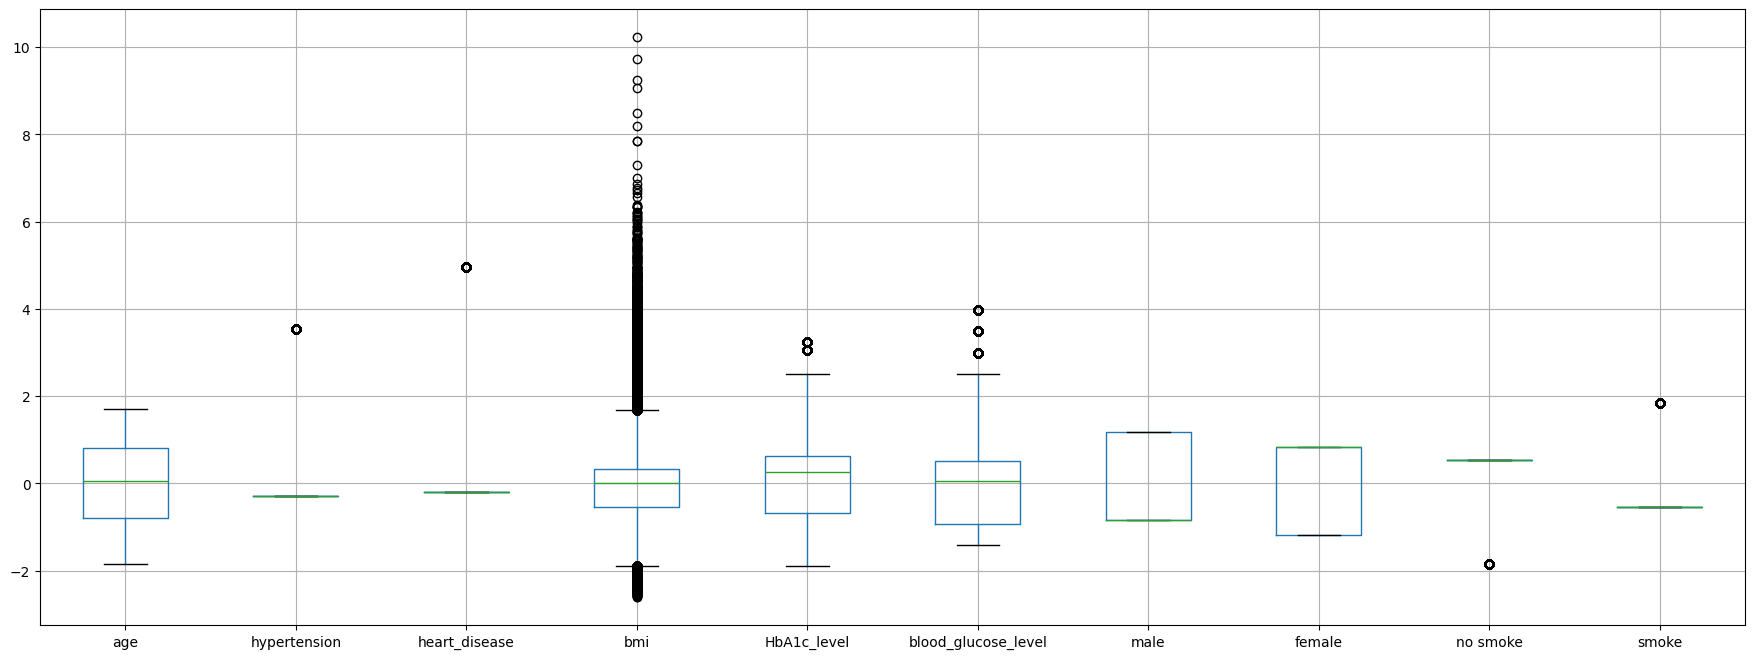

In [6]:
# Visualización gráfica de los datos de entrenamiento normalizados
print('Set de entrenamiento normalizado')
train_scaled.boxplot(figsize=(22, 8))

Set de pruebas normalizado


<Axes: >

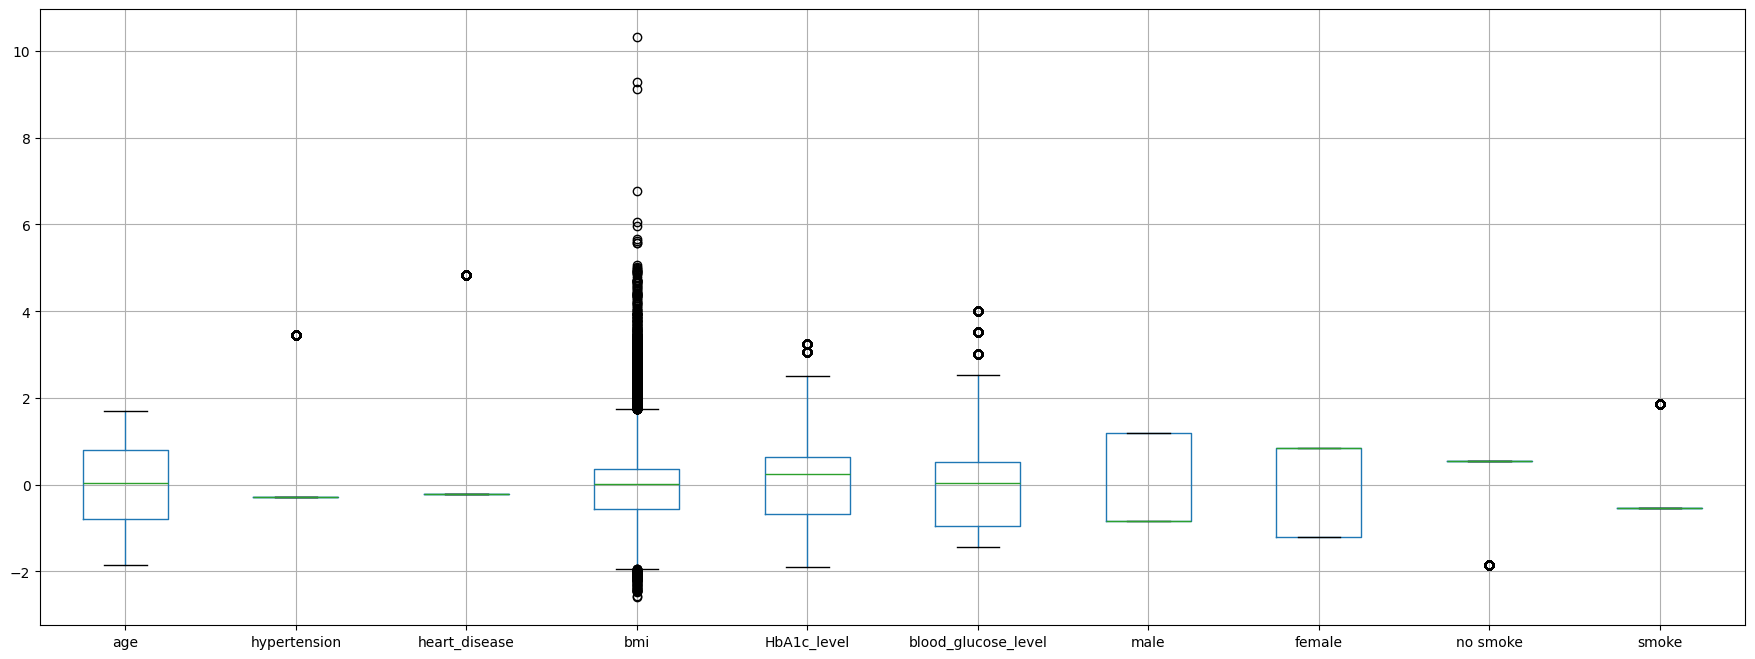

In [7]:
# Visualización gráfica de los datos de pruebas normalizados
print('Set de pruebas normalizado')
test_scaled.boxplot(figsize=(22, 8))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model  =  Sequential([
                    Dense(64, activation='relu', input_shape=train_scaled.shape[1:]),
                    Dense(64, activation='relu'),
                    Dense(2, activation='softmax')])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,994 (19.51 KB)

 Trainable params: 4,994 (19.51 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
 model.compile(optimizer= "adam", loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

In [10]:
history = model.fit(train_scaled, train_labels, epochs = 5)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9480 - loss: 0.1499
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9676 - loss: 0.0978
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9695 - loss: 0.0886
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9716 - loss: 0.0844
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9709 - loss: 0.0858


In [11]:
test_loss, test_accuracy = model.evaluate(test_scaled, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9725 - loss: 0.0822
Test loss: 0.08336968719959259
Test accuracy: 0.972000002861023


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

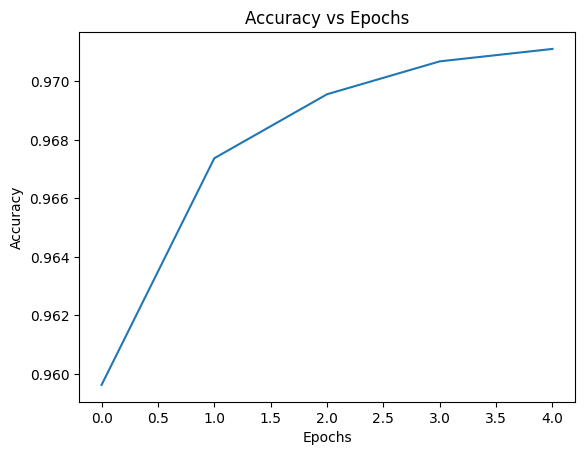

In [12]:
frame = pd.DataFrame(history.history)
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

In [13]:
# Matriz de confusión

predictions = model.predict(test_scaled)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
import numpy as np
from tabulate import tabulate
from tensorflow.math import confusion_matrix

tensorflow_confusion_matrix = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
print(tabulate(tensorflow_confusion_matrix.numpy()))

-----  ----
18318     6
  554  1122
-----  ----


In [15]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

accuracy = accuracy_score(test_labels, np.argmax(predictions, axis=1))
precision = precision_score(test_labels, np.argmax(predictions, axis=1), average='macro')
recall = recall_score(test_labels, np.argmax(predictions, axis=1), average='macro')
f1 = f1_score(test_labels, np.argmax(predictions, axis=1))

print("Accuray: ", accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ",f1)

Accuray:  0.972
Precision:  0.9826625959431061
Recall:  0.8345618172809868
F1:  0.8002853067047075
